## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以 Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
  
提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態；      
2.把題目中的 Survived 用 Survived_cate 來做分析；       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
#!pip install researchpy
#!pip install pingouin

In [2]:
# import library
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import pingouin as pg
import researchpy   
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline

## 讀入資料

In [3]:
df_train = pd.read_csv( 'Titanic_train.csv' )
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 檢查訓練資料集中是否有遺失值 ?
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count

Missing_Counts(df_train)

,ColumnName,MissingCount,Percentage(%)
0,Embarked,2,0.22
1,Age,177,19.87
2,Cabin,687,77.10


### 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate

In [6]:
df_train['Survived_cate'] = df_train['Survived'].astype('object')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?

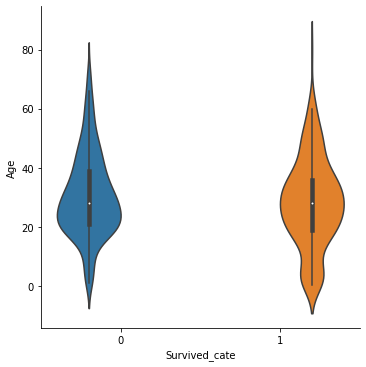

In [7]:
g = sns.catplot( x='Survived_cate', y='Age', hue='Survived_cate', data=df_train, kind='violin' )
plt.show()

In [8]:
data = df_train[['Age','Survived_cate']]
aov = pg.anova( dv='Age', between='Survived_cate', data=data, detailed=True )
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [9]:
print( '組間變異數 = ', aov.SS[0] )
print( '組內變異數 = ', aov.SS[1] )
print( '總變異數 = ', aov.SS[0]+aov.SS[1] )

組間變異數 =  897.1875816713222
組內變異數 =  149559.44836244633
總變異數 =  150456.63594411765


In [10]:
# 計算 𝜼 ^𝟐

etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [11]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

judgment_etaSq(etaSq)

'Negligible'

### Ans 1: 藉由  $\eta^2$ 推得 'Age' 與 'Survived' 無相關性。

### Q2: 透過數值法計算  Sex 和 Survived  是否有相關性?

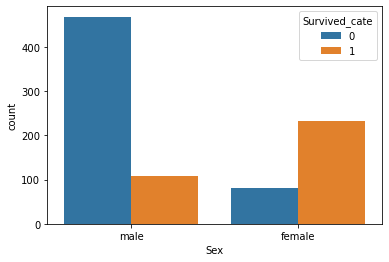

In [12]:
g= sns.countplot( x='Sex', hue='Survived_cate', data=df_train )
plt.show()

Method: Cramer’s V Coefficient  

$$\displaystyle V=\sqrt{\frac{\chi^2}{n\times \min(r,c)-1}}$$  
where $r$ is the number of rows in contingency table, $c$ is the number of columns in contingency table, and $n$ is the grand total of observations. 

In [13]:
# Step 1: 列聯表(Contingency table)

contTable = pd.crosstab( df_train['Sex'], df_train['Survived_cate'] )
contTable

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [14]:
# Step 2: 自由度 df 

df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [15]:
# Step 3: 運用 researchpy 套件計算 Cramer's V 係數

# 這邊用卡方檢定獨立性，所以採用的 test 參數為卡方 "test =" argument。
# 採用的變數在這個模組中，會自己根據資料集來判斷 : Cramer's Phi if it a 2x2 table, or Cramer's V is larger than 2x2.

crosstab, res = researchpy.crosstab(df_train['Survived_cate'], df_train['Sex'], test='chi-square')
print( "Cramer's value is", res.loc[2,'results'] )

Cramer's value is 0.5434


In [16]:
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV( df,res.loc[2,'results'] )

'large'

### Ans 2: 藉由 Cramer's V 推得 'Sex' 與 'Survived' 存有高度的相關性。

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

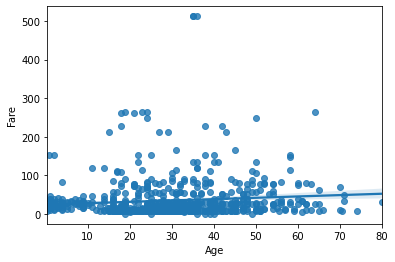

In [17]:
g = sns.regplot( x='Age', y='Fare', data=df_train )
plt.show()

Method: Pearson Correlation Coefficient 

In [18]:
# Note: feature must not contain infs or NaNs!

data = df_train[['Age','Fare']].dropna()
corr, _ = stats.pearsonr( data['Age'], data['Fare'] )
print(corr)

0.0960666917690389


### Ans 3: 藉由 Pearson Correlation Coefficient 推得 'Age' 與 'Fare' 無線性相關性。